## Table of Content

- Hypothesis Testing

- EDA

- Data Cleaning

- Feature Engineering

- Model Building

- Making Final Submission

### Hypothesis Generation

1. Most people might tend to rent a bike during morning for going to office or after office hours to return home.

2. Users might rent a bike during weehdays instead of weekends and holidays.

3. In India ,temperature and negative correlation with the rentals, but it might be a diffrent case in Washington.

4. Users will preferr to rent a bike when humidity is low.

5. The demand of bikes will be low during rainy days.

6. It is expected that registered users are more than casual users.

7. Traffic can be positively correlated with Bike demand. Higher traffic may force people to use bike as compared to other road transport medium like car, taxi etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime
from scipy.stats import probplot

%matplotlib inline

In [2]:
train_original=pd.read_csv('train.csv')
test_original=pd.read_csv('test.csv')

### EDA

- Univaiate Analysis

- Multivariate Analysis

In [3]:
train_original.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test_original.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
print('The size of train data is >> ',train_original.shape)
print('The size of test data is >> ',test_original.shape)

The size of train data is >>  (10886, 12)
The size of test data is >>  (6493, 9)


In [6]:
## Combine the dataset together for Better EDA

train=train_original.copy()
test=test_original.copy()

train['source']='train'
test['source']='test'

data=pd.concat([train,test],ignore_index=True)

In [7]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,source
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,train
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,train
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,train
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,train
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,train


In [8]:
data.shape

(17379, 13)

In [9]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,10886.000000,10886.000000,10886.000000
mean,2.501640,0.028770,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,36.021955,155.552177,191.574132
std,1.106918,0.167165,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,118.000000,145.000000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
 12  source      17379 non-null  object 
dtypes: float64(6), int64(5), object(2)
memory usage: 1.7+ MB


In [11]:
## let us see the unique values in every column

data.apply(lambda x: len(x.unique()))

datetime      17379
season            4
holiday           2
workingday        2
weather           4
temp             50
atemp            65
humidity         89
windspeed        30
casual          310
registered      732
count           823
source            2
dtype: int64

In [12]:
(data.isnull().mean())*100

datetime       0.000000
season         0.000000
holiday        0.000000
workingday     0.000000
weather        0.000000
temp           0.000000
atemp          0.000000
humidity       0.000000
windspeed      0.000000
casual        37.361183
registered    37.361183
count         37.361183
source         0.000000
dtype: float64

We can see that Null values are mostly present in registered & casual column.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
 12  source      17379 non-null  object 
dtypes: float64(6), int64(5), object(2)
memory usage: 1.7+ MB


#### Univariate Analysis

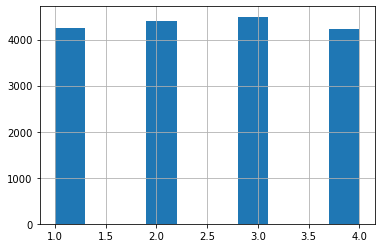

In [14]:
data['season'].hist()
plt.savefig('Univariate_1.png')

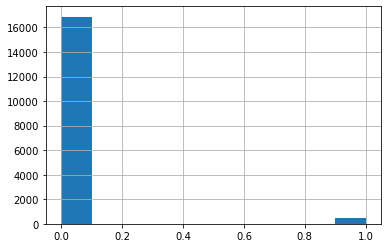

In [15]:
data['holiday'].hist()
plt.savefig('Univariate_2.png')

This proves one of our Hypothesis that ppl usually preferr when it is not a holiday.

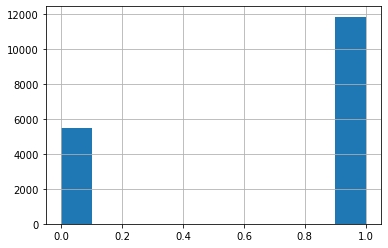

In [17]:
data['workingday'].hist()

The demand for bikes is higher on working day.

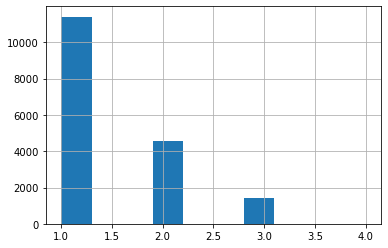

In [18]:
data['weather'].hist()

 The demand for bike is mosly during clear weather

C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


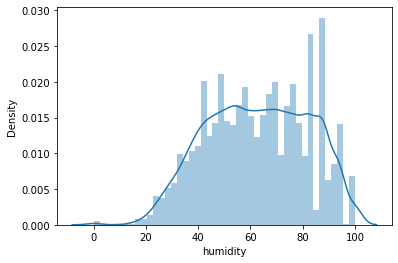

In [16]:
sns.distplot(data['humidity'])
plt.savefig('Univariate_2.png')

C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


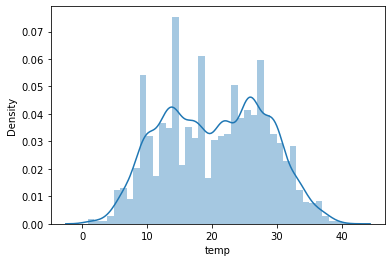

In [20]:
sns.distplot(data['temp'])

We can see that both Humidity & Temperature are normally distributed

#### Multi-variate analysis

In [5]:
data['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
17374    2012-12-31 19:00:00
17375    2012-12-31 20:00:00
17376    2012-12-31 21:00:00
17377    2012-12-31 22:00:00
17378    2012-12-31 23:00:00
Name: datetime, Length: 17379, dtype: object

In [17]:
data['date']=data.datetime.apply(lambda x : x.split()[0])
data['hour']=data.datetime.apply(lambda x : x.split()[1].split(':')[0])
data['weekday']=data['date'].apply(lambda x:calendar.day_name[datetime.strptime(x,'%Y-%m-%d').weekday()])
data["month"] = data.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])

C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


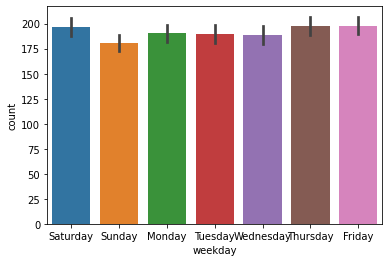

In [18]:
sns.barplot(data['weekday'],data['count'])
plt.savefig('Multivariate_1.png')

There is not much diffrence during weekends in the bike demands.

C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


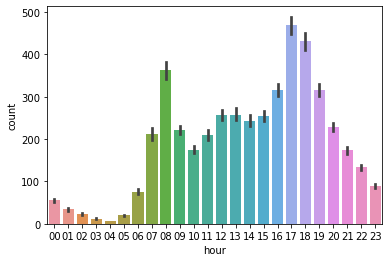

In [19]:
sns.barplot(data['hour'],data['count'])
plt.savefig('Multivariate_2.png')

We can clearly see that bike demand is the highest during early office hours(8HRS) and late office hours (5hrs).

C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='hour', ylabel='count'>

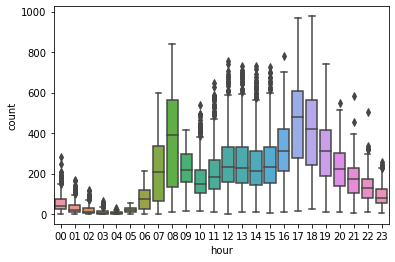

In [9]:
sns.boxplot(data['hour'],data['count'])

C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


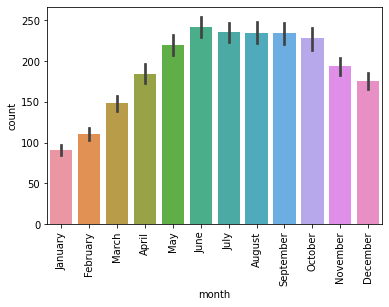

In [20]:
sns.barplot(data['month'],data['count'])
plt.xticks(rotation=90)
plt.savefig('Multivariate_3.png')
plt.show()

We can see that the bike demand is highest between  June-Sept maybe due to good wheather


C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


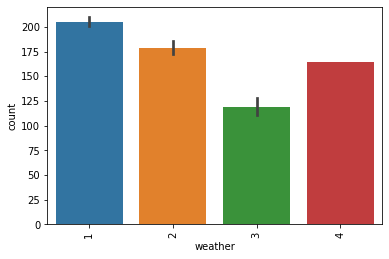

In [11]:
sns.barplot(data['weather'],data['count'])
plt.xticks(rotation=90)
plt.show()

We can see that weather=1 is mostly prefrred for bike riding

1: " Clear + Few clouds + Partly cloudy + Partly cloudy"

3:   "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"

### Data Cleaning

In [12]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,source,date,hour,weekday,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,train,2011-01-01,00,Saturday,January
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,train,2011-01-01,01,Saturday,January
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,train,2011-01-01,02,Saturday,January
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,train,2011-01-01,03,Saturday,January
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,train,2011-01-01,04,Saturday,January


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
 12  source      17379 non-null  object 
 13  date        17379 non-null  object 
 14  hour        17379 non-null  object 
 15  weekday     17379 non-null  object 
 16  month       17379 non-null  object 
dtypes: float64(6), int64(5), object(6)
memory usage: 2.3+ MB


We can see that some features are discreate but still int.So we will do Encoding.

In [21]:
data["season_label"] = data.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })

data["weather_label"] = data.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

In [22]:
categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]
for var in categoryVariableList:
    data[var] = data[var].astype("category")

In [23]:
data.isnull().sum()

datetime            0
season              0
holiday             0
workingday          0
weather             0
temp                0
atemp               0
humidity            0
windspeed           0
casual           6493
registered       6493
count            6493
source              0
date                0
hour                0
weekday             0
month               0
season_label        0
weather_label       0
dtype: int64

C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


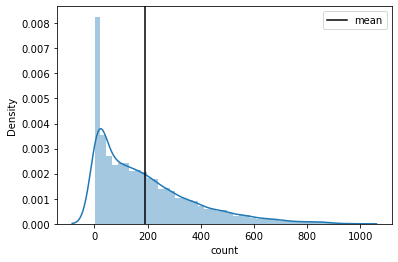

In [24]:
sns.distplot(data['count'])
plt.axvline(data['count'].mean(),c='k',label='mean')
plt.legend()

plt.show()

We can clearly see that the distribution is right skewed. We will do *Log Transformation*.

In [18]:
data['count']=np.log(1+data['count'])

C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


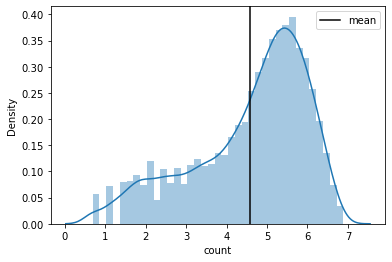

In [19]:
sns.distplot(data['count'])
plt.axvline(data['count'].mean(),c='k',label='mean')
plt.legend()

plt.show()

In [20]:
## Correlation

<AxesSubplot:>

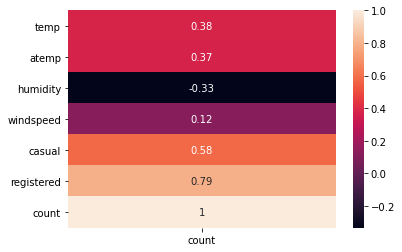

In [21]:
corr_df=data.corr()
sns.heatmap(corr_df[['count']],annot=True)

- We can see that Registered users have a strong **positive correlation** with the Target

- We can see that Humidity have a strong **negative correlation** with the Target

<AxesSubplot:xlabel='month'>

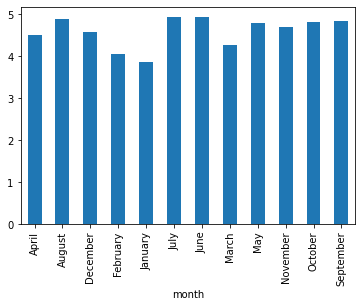

In [22]:
data.groupby("month")["count"].mean().plot.bar()

In [23]:
# sns.barplot(sorted(data['month']),data['count'],hue=data['weekday'])
# plt.xticks(rotation=90)
# plt.show()


agg_hour=pd.DataFrame(data.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()
agg_hour


,hour,weekday,count
0,00,Friday,3.841933
1,00,Monday,3.374374
2,00,Saturday,4.436807
3,00,Sunday,4.459458
4,00,Thursday,3.458555
...,...,...,...
163,23,Saturday,4.644716
164,23,Sunday,4.005908
165,23,Thursday,4.457634
166,23,Tuesday,4.172495


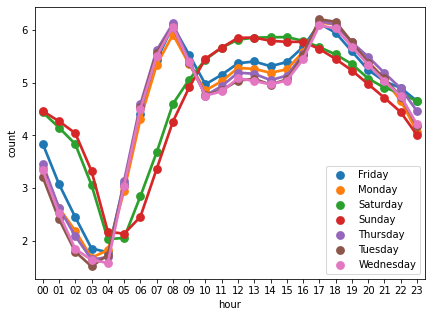

In [24]:
plt.figure(figsize=(7,5))
sns.pointplot(data=agg_hour,x=agg_hour["hour"], y=agg_hour["count"], hue=agg_hour["weekday"])
plt.legend(loc='best')

In [25]:
data=data.drop(['weather_label','season_label','date'],axis=1)

In [26]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,source,hour,weekday,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,train,00,Saturday,January
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,train,01,Saturday,January
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,train,02,Saturday,January
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,train,03,Saturday,January
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,train,04,Saturday,January


### Feature Engineering

 we will create new variables to improve the prediction power of model

Day Type: Created a variable having categories like “weekday”, “weekend” and “holiday”

In [27]:
data.loc[(data['holiday']==0) & (data['workingday']==0),'day_type']='weekend'
data.loc[(data['holiday']==0) & (data['workingday']==1),'day_type']='weekday'
data.loc[data['holiday']==1,'day_type']='holiday'

C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


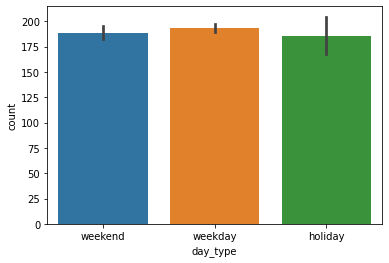

In [28]:
sns.barplot(data['day_type'],data['count'])
plt.savefig('Feature_eng_1.png')

###### We can see that there is not much diffrence in the day_type.

In [29]:
data['hour']=data['hour'].astype(int)

data.loc[data['hour']<8,'hour']=1
data.loc[data['hour']>=22,'hour']=2
data.loc[(data['hour']>9) & (data['hour']<18),'hour']=3
data.loc[data['hour']==8,'hour']=4
data.loc[data['hour']==9,'hour']=5
data.loc[(data['hour']==20) | (data['hour']==21),'hour']=6
data.loc[(data['hour']==19) | (data['hour']==18),'hour']=7

In [30]:
data['hour']=data['hour'].astype('category')

<AxesSubplot:>

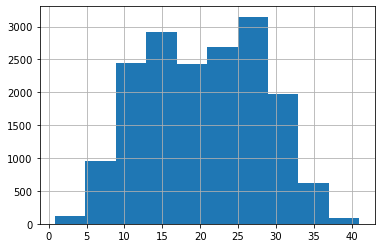

In [79]:
# data['temp'].hist()

###### We can do the same with the temp column

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    17379 non-null  object  
 1   season      17379 non-null  category
 2   holiday     17379 non-null  category
 3   workingday  17379 non-null  category
 4   weather     17379 non-null  category
 5   temp        17379 non-null  float64 
 6   atemp       17379 non-null  float64 
 7   humidity    17379 non-null  int64   
 8   windspeed   17379 non-null  float64 
 9   casual      10886 non-null  float64 
 10  registered  10886 non-null  float64 
 11  count       10886 non-null  float64 
 12  source      17379 non-null  object  
 13  hour        17379 non-null  category
 14  weekday     17379 non-null  category
 15  month       17379 non-null  category
dtypes: category(7), float64(6), int64(1), object(2)
memory usage: 1.3+ MB


In [52]:
## dropping unecessary columns

In [31]:
data=pd.get_dummies(data,columns=['season','weather','month','weekday','hour','day_type'],drop_first=True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   datetime           17379 non-null  object  
 1   holiday            17379 non-null  category
 2   workingday         17379 non-null  category
 3   temp               17379 non-null  float64 
 4   atemp              17379 non-null  float64 
 5   humidity           17379 non-null  int64   
 6   windspeed          17379 non-null  float64 
 7   casual             10886 non-null  float64 
 8   registered         10886 non-null  float64 
 9   count              10886 non-null  float64 
 10  source             17379 non-null  object  
 11  season_2           17379 non-null  uint8   
 12  season_3           17379 non-null  uint8   
 13  season_4           17379 non-null  uint8   
 14  weather_2          17379 non-null  uint8   
 15  weather_3          17379 non-null  uint8   
 16  weat

In [47]:
data.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,weekday_Tuesday,weekday_Wednesday,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,day_type_weekday,day_type_weekend
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3.0,13.0,2.833213,...,0,0,0,0,0,0,0,0,0,1
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8.0,32.0,3.713572,...,0,0,0,0,0,0,0,0,0,1
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5.0,27.0,3.496508,...,0,0,0,0,0,0,0,0,0,1
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3.0,10.0,2.639057,...,0,0,0,0,0,0,0,0,0,1
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0.0,1.0,0.693147,...,0,0,0,0,0,0,0,0,0,1


### Model Building

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_log_error

In [34]:
train=data[data['source']=='train']
test=data[data['source']=='test']

In [35]:
train=train.drop(['source','datetime','atemp'],axis=1)
test=test.drop(['source','datetime','atemp'],axis=1)

In [36]:
X=train.drop(['registered','casual','count'],axis=1)
y=train['count']
test.drop(['registered','casual','count'],axis=1,inplace=True) ## For Final Prediction

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30 ,random_state = 2)

In [37]:
## Using Desicion_Tree
dt = DecisionTreeRegressor(random_state=2)
dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=2)

In [38]:
y_pred = dt.predict(x_test)

from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle)
# print('Len for the registered data:',len(y_pred))

RMLSE for the data: 1.0698032416580616


In [39]:
predsTest = dt.predict(test)
predsTest

array([ 34. ,  11. ,  11. , ..., 132. ,  17. ,  15.5])

In [55]:
## RandomForest

rt = RandomForestRegressor(n_estimators= 200)
rt.fit(x_train,y_train)

RandomForestRegressor(n_estimators=200)

In [56]:
y_pred = rt.predict(x_test)

msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle)
# print('Len for the registered data:',len(y_pred))

RMLSE for the data: 0.19307418427751497


#### With Pipeline

In [40]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
# models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
# models.append(('SVR', SVR()))

In [41]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=5)
    cv_results = cross_val_score(model, X, y, cv=kfold, \
                                 scoring='r2') 
   
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -904896999034.235718 (1809793998069.499023)
LASSO: 0.508582 (0.014497)
EN: 0.296762 (0.010634)
CART: 0.405594 (0.035838)


In [42]:
results_df = pd.DataFrame(results)
results_df.index = names
results_df.columns = 'CV1 CV2 CV3 CV4 CV5'.split()
CV_means = [arr.mean() for arr in results]
results_df['CV_Mean'] = CV_means

CV_std = [arr.std() for arr in results]
results_df['CV_Std'] = CV_std
# results_df['CV_Std'] = results_df.iloc[:,:5].std(axis = 0)

results_df.sort_values(by='CV_Mean', ascending=False)
results_df*100

,CV1,CV2,CV3,CV4,CV5,CV_Mean,CV_Std
LR,50.503844,53.976595,-4.524485e+14,49.795975,51.193999,-9.048970e+13,1.809794e+14
LASSO,50.033066,53.050617,5.191763e+01,48.954220,50.335547,5.085822e+01,1.449706e+00
EN,30.277767,29.998528,3.043041e+01,27.569967,30.104358,2.967621e+01,1.063404e+00
CART,46.628496,38.732016,3.789021e+01,36.972874,42.573216,4.055936e+01,3.583754e+00


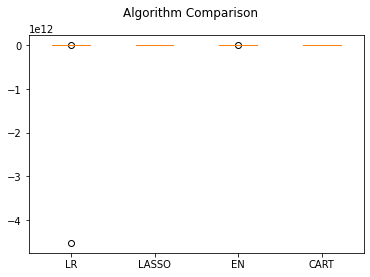

In [43]:
#%% Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig('model_pipeline.png')
plt.show()

##### Using  Ensembled methods for scoring


In [44]:
ensembles = []
ensembles.append(('AB', AdaBoostRegressor()))
ensembles.append(('GBM', GradientBoostingRegressor()))
ensembles.append(('RF', RandomForestRegressor()))
ensembles.append(('ET', ExtraTreesRegressor()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=5, shuffle=True, random_state=5)
    cv_results = cross_val_score(model, X, y,cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.346531 (0.020396)
GBM: 0.644863 (0.012251)
RF: 0.654960 (0.008063)
ET: 0.607912 (0.012113)


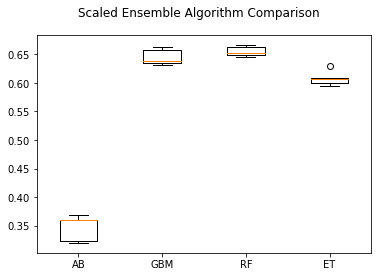

In [45]:
#%% Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig('ensembled_pipeline.png')
plt.show()

#### Finally we will use Random Forest to make the Final Prediction.

In [62]:
## RandomForest
rt = RandomForestRegressor(n_estimators= 200)
rt.fit(x_train,y_train)

RandomForestRegressor(n_estimators=200)

In [63]:
y_pred = rt.predict(x_test)

msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle)
# print('Len for the registered data:',len(y_pred))

RMLSE for the data: 0.24010518805946107


In [64]:
predsTest = rt.predict(test)
predsTest

array([3.72679266, 3.71837212, 3.71837212, ..., 3.96313019, 3.857241  ,
       3.53867881])

We can see that Random Forest has the Highest score .

#### Making the Prediction file

In [65]:
## Make Submission

submission = pd.DataFrame({
        "datetime": test_original['datetime'],
        "count":predsTest
    })
submission.to_csv('r_tree_submission.csv', index=False)